# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [14]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [33]:
# Rename all the columns to lower case

df.columns = [col.lower() for col in df.columns]
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [34]:
# Change the index to 'linename'


df = df.set_index('linename')
df.head()



,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Reset the index: 

In [35]:
# Reset the index
df = df.reset_index() 
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [36]:
# Add a new 'num_lines' column


df['num_lines'] = df['linename'].map(lambda x: len(x))
df

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7
...,...,...,...,...,...,...,...,...,...,...,...,...
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348,1
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348,1
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348,1
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348,1


Write a function to clean column names: 

In [37]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip()
    return cleaned

In [38]:
# Use the above function to clean the column names

df.columns = [clean(col) for col in df.columns]
type(df.columns)
df.columns


Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

In [39]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [41]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.dayofweek

df
help(df['date'].dt)

Help on DatetimeProperties in module pandas.core.indexes.accessors object:

class DatetimeProperties(Properties)
 |  Accessor object for datetimelike properties of the Series values.
 |  
 |  Examples
 |  --------
 |  >>> s.dt.hour
 |  >>> s.dt.second
 |  >>> s.dt.quarter
 |  
 |  Returns a Series indexed like the original Series.
 |  Raises TypeError if the Series does not contain datetimelike values.
 |  
 |  Method resolution order:
 |      DatetimeProperties
 |      Properties
 |      pandas.core.accessor.PandasDelegate
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.NoNewAttributesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  ceil(self, *args, **kwargs)
 |      Perform ceil operation on the data to the specified `freq`.
 |      
 |      Parameters
 |      ----------
 |      freq : str or Offset
 |          The frequency level to ceil the index to. Must be a fixed
 |          frequency like 'S' (secon

In [42]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped
#grouped.plot(kind='barh')
#plt.show()

,entries,exits,num_lines
day_of_week,,,
0,1114237052454,911938153513,76110
1,1143313287046,942230721477,77303
2,1123655222441,920630864687,75713
3,1122723988662,920691927110,76607
4,1110224700078,906799065337,75573
5,1115661545514,909142081474,74725
6,1192306179082,959223750461,75306


- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [43]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head()

,day_of_week,entries,exits,num_lines
0,0,1114237052454,911938153513,76110
1,1,1143313287046,942230721477,77303
2,2,1123655222441,920630864687,75713
3,3,1122723988662,920691927110,76607
4,4,1110224700078,906799065337,75573


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [45]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

grouped

,day_of_week,entries,exits,num_lines,is_weekend
0,0,1114237052454,911938153513,76110,False
1,1,1143313287046,942230721477,77303,False
2,2,1123655222441,920630864687,75713,False
3,3,1122723988662,920691927110,76607,False
4,4,1110224700078,906799065337,75573,False
5,5,1115661545514,909142081474,74725,True
6,6,1192306179082,959223750461,75306,True


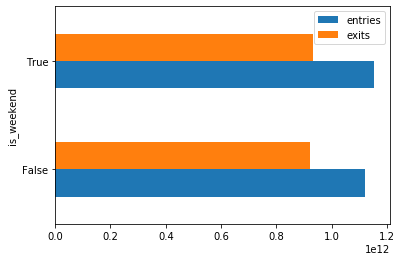

In [52]:
# Group the data by weekend/weekday and plot the sum of the numeric columns

wkend = grouped.groupby('is_weekend').mean()
wkend
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a', 'scp'], axis=1)
df.head(2)

## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

Great! You practiced your data cleanup skills using Pandas.